<a href="https://colab.research.google.com/github/seonahryu/Data-Science-Projects-2024/blob/main/pima_classification_baseline_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/corazzon/boostcourse-ds-511/blob/master/pima-classification-baseline-01.ipynb)


* 강좌 보기 : https://www.edwith.org/boostcourse-ds-511

<img src="https://upload.wikimedia.org/wikipedia/commons/6/6f/Pima.jpg" width=200>

* [Pima people - Wikipedia](https://en.wikipedia.org/wiki/Pima_people)

## 데이터셋 출처
* [Pima Indians Diabetes Database | Kaggle](https://www.kaggle.com/uciml/pima-indians-diabetes-database)
* https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html


### 데이터 구성

* Pregnancies : 임신 횟수
* Glucose : 2시간 동안의 경구 포도당 내성 검사에서 혈장 포도당 농도
* BloodPressure : 이완기 혈압 (mm Hg)
* SkinThickness : 삼두근 피부 주름 두께 (mm), 체지방을 추정하는데 사용되는 값
* Insulin : 2시간 혈청 인슐린 (mu U / ml)
* BMI : 체질량 지수 (체중kg / 키(m)^2)
* DiabetesPedigreeFunction : 당뇨병 혈통 기능
* Age : 나이
* Outcome : 768개 중에 268개의 결과 클래스 변수(0 또는 1)는 1이고 나머지는 0입니다.


## 필요한 라이브러리 로드

In [1]:
# 데이터 분석을 위한 pandas, 수치계산을 위한 numpy
# 시각화를 위한 seaborn, matplotlib.pyplot 을 로드합니다.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 데이터셋 로드

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
df = pd.read_csv("/diabetes.csv")
df.shape

(768, 9)

In [9]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## 학습, 예측 데이터셋 나누기

In [10]:
# 8:2 의 비율로 구하기 위해 전체 데이터의 행에서 80% 위치에 해당되는 값을 구해서 split_count 라는 변수에 담습니다.
split_count = int(df.shape[0] * 0.8)
split_count # 614번째 data를 기준으로 split

614

In [11]:
# train, test로 슬라이싱을 통해 데이터를 나눕니다.
train = df[:split_count].copy() # 614번째(split_count)까지 나누겠다.
train.shape

(614, 9)

In [13]:
test = df[split_count:].copy() # 614번째(split_count) 이후부터 나누겠다.
test.shape

(154, 9)

## 학습, 예측에 사용할 컬럼

In [16]:
# feature_names 라는 변수에 학습과 예측에 사용할 컬럼명을 가져옵니다.
feature_names = train.columns[:-1].tolist() # 맨마지막 값(Outcome) 제외하고 사용.
feature_names

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

## 정답값이자 예측해야 될 값

In [17]:
# label_name 이라는 변수에 예측할 컬럼의 이름을 담습니다.

label_name = train.columns[-1]
label_name

'Outcome'

## 학습, 예측 데이터셋 만들기

In [18]:
# 학습 세트 만들기 예) 시험의 기출문제
# feature_names 변수에 들어있는 열만 가져옵니다.
X_train = train[feature_names]
print(X_train.shape)
X_train.head()

(614, 8)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [19]:
# 정답 값을 만들어 줍니다. 예) 기출문제의 정답
y_train = train[label_name]
print(y_train.shape)
y_train.head()

(614,)


0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [21]:
# 예측에 사용할 데이터 세트를 만듭니다. 예) 실전 시험 문제

X_test = test[feature_names]
print(X_test.shape)
X_test.head()

(154, 8)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
614,11,138,74,26,144,36.1,0.557,50
615,3,106,72,0,0,25.8,0.207,27
616,6,117,96,0,0,28.7,0.157,30
617,2,68,62,13,15,20.1,0.257,23
618,9,112,82,24,0,28.2,1.282,50


In [22]:
# 예측의 정답값 예) 실전 시험 문제의 정답
y_test = test[label_name]

print(y_test.shape)
y_test.head()

(154,)


614    1
615    0
616    0
617    0
618    1
Name: Outcome, dtype: int64

## 머신러닝 알고리즘 가져오기

In [23]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)
model

DecisionTreeClassifier(random_state=42)

## 학습(훈련)
* 시험을 볼 때 기출문제(X_train)와 정답(y_train)을 보고 공부하는 과정과 유사합니다.

In [24]:
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

## 예측
* 실전 시험문제(X_test)라고 보면 됩니다. 우리가 정답을 직접 예측합니다.

In [25]:
y_predict = model.predict(X_test)
y_predict[:5]

array([1, 0, 1, 0, 1])

## 트리 알고리즘 분석하기
* 의사결정나무 → 시각화 용이하다는 장점!

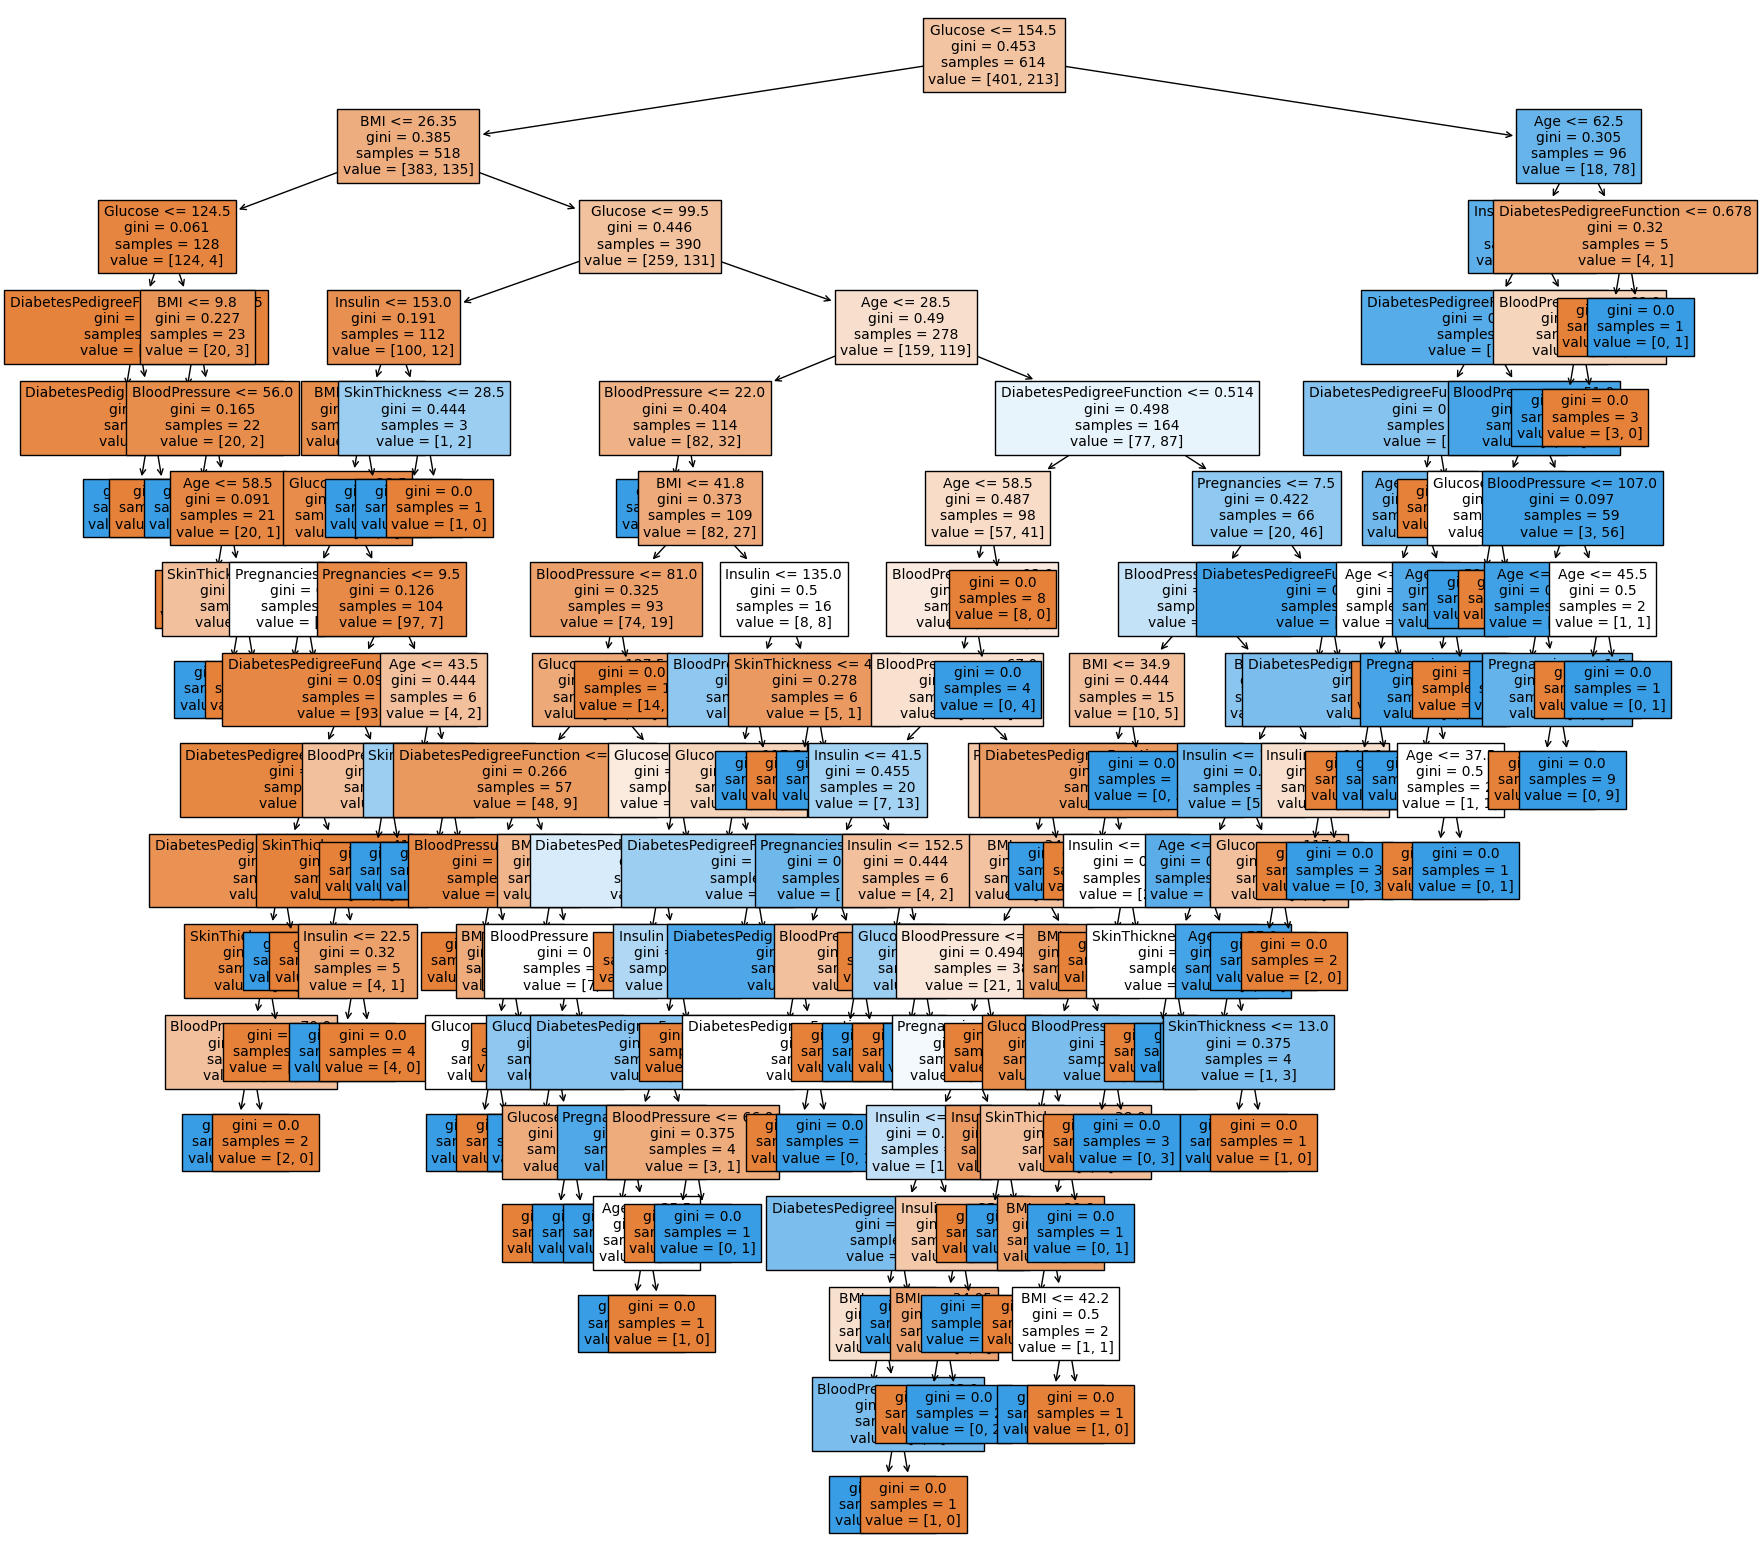

In [27]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 20))
tree = plot_tree(model,
                 feature_names=feature_names,
                 filled=True,
                 fontsize=10)

In [ ]:
# graphviz 를 통해 시각화 합니다.
# graphviz 는 별도의 설치가 필요합니다.
# graphviz 와 파이썬에서 graphviz 를 사용할 수 있게 해주는 도구 2가지를 설치해 주셔야 합니다.
# import graphviz
# from sklearn.tree import export_graphviz

# dot_tree = export_graphviz(model,
#                            feature_names = feature_names,
#                            filled=True)
# graphviz.Source(dot_tree)

In [29]:
# 피처의 중요도를 추출하기

model.feature_importances_
# ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']

array([0.05944171, 0.30368248, 0.13140431, 0.04020035, 0.09010707,
       0.15739296, 0.12077948, 0.09699165])

<Axes: >

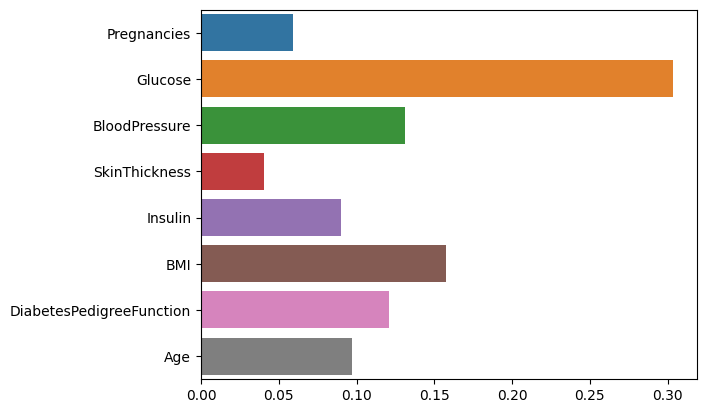

In [30]:
# 피처의 중요도 시각화 하기

sns.barplot(x=model.feature_importances_, y=feature_names)

## 정확도(Accuracy) 측정하기

In [31]:
# 실제값 - 예측값을 빼주면 같은 값은 0으로 나오게 됩니다.
# 여기에서 절대값(abs함수)을 씌운 값 = 1인 값이 다르게 예측한 값이 됩니다.

abs(y_test - y_predict)

614    0
615    0
616    1
617    0
618    0
      ..
763    0
764    0
765    0
766    0
767    0
Name: Outcome, Length: 154, dtype: int64

In [37]:
diff_count = abs(y_test - y_predict).sum()
diff_count # 다르게 예측한 개수

44

In [38]:
abs(y_test - y_predict).sum() / len(y_test) # 잘못 예측한 비율

0.2857142857142857

In [39]:
# 예측의 정확도를 구합니다. 100점 만점 중에 몇 점을 맞았는지 구한다고 보면 됩니다.

(len(y_test) - diff_count) / len(y_test) * 100

71.42857142857143

In [42]:
# 위에서처럼 직접 구할 수도 있지만 미리 구현된 알고리즘을 가져와 사용합니다.

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict) * 100

71.42857142857143

In [41]:
# model 의 score 로 점수를 계산합니다.
model.score(X_test, y_test) * 100

71.42857142857143